In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


#seaborn style for better aesthetics
sns.set(style="whitegrid")
df = pd.read_csv('education_inequality_data.csv')
print(df.shape)


(1000, 12)


In [4]:
df.head()

,id,school_name,state,school_type,grade_level,funding_per_student_usd,avg_test_score_percent,student_teacher_ratio,percent_low_income,percent_minority,internet_access_percent,dropout_rate_percent
0,1,Bowman High School,Michigan,Private,High,9575.80,65.9,17.5,30.0,44.0,74.1,3.44
1,2,Foster High School,Michigan,Charter,Middle,16733.10,87.3,24.2,93.5,40.1,79.9,8.67
2,3,Henson High School,New York,Public,Middle,24890.74,72.8,27.0,58.1,35.8,51.1,14.75
3,4,Weaver High School,Texas,Private,Elementary,6857.49,81.5,26.2,82.7,72.0,55.5,13.45
4,5,King Elementary School,Michigan,Public,Elementary,16910.73,44.7,20.2,41.4,16.1,57.8,6.98


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       1000 non-null   int64  
 1   school_name              1000 non-null   object 
 2   state                    1000 non-null   object 
 3   school_type              1000 non-null   object 
 4   grade_level              1000 non-null   object 
 5   funding_per_student_usd  1000 non-null   float64
 6   avg_test_score_percent   1000 non-null   float64
 7   student_teacher_ratio    1000 non-null   float64
 8   percent_low_income       1000 non-null   float64
 9   percent_minority         1000 non-null   float64
 10  internet_access_percent  1000 non-null   float64
 11  dropout_rate_percent     1000 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 93.9+ KB


In [6]:
df.describe()

,id,funding_per_student_usd,avg_test_score_percent,student_teacher_ratio,percent_low_income,percent_minority,internet_access_percent,dropout_rate_percent
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,15154.160180,70.001000,19.733200,53.756400,49.652000,74.688500,7.765600
std,288.819436,5931.384208,17.703408,5.823201,24.021689,25.241025,14.433086,4.214452
min,1.000000,5012.970000,40.000000,10.000000,10.200000,5.000000,50.000000,0.500000
25%,250.750000,9726.040000,54.575000,14.800000,33.400000,29.300000,62.400000,4.050000
50%,500.500000,15362.465000,69.900000,19.400000,54.100000,49.450000,74.750000,7.685000
75%,750.250000,20280.007500,85.625000,25.000000,74.600000,69.950000,87.325000,11.492500
max,1000.000000,24981.900000,100.000000,30.000000,94.900000,94.900000,100.000000,14.990000


In [7]:
df.isnull().sum()

id                         0
school_name                0
state                      0
school_type                0
grade_level                0
funding_per_student_usd    0
avg_test_score_percent     0
student_teacher_ratio      0
percent_low_income         0
percent_minority           0
internet_access_percent    0
dropout_rate_percent       0
dtype: int64

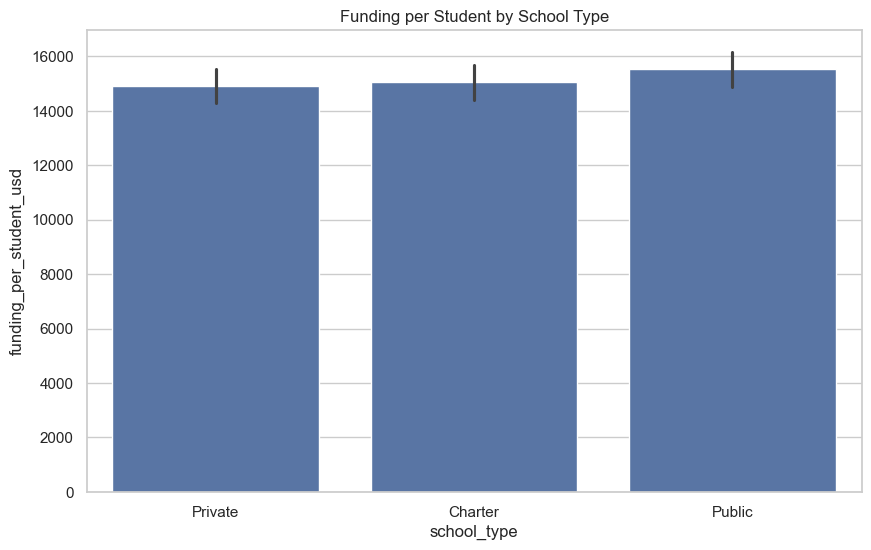

In [9]:
plt.figure(figsize=(10, 6))
sns.barplot(x='school_type', y='funding_per_student_usd', data=df)
plt.title("Funding per Student by School Type")
plt.xlabel("school_type")
plt.ylabel("funding_per_student_usd")
plt.show()

In [58]:
df_model = df.copy()

In [59]:
from sklearn.preprocessing import LabelEncoder

# Label encode ordinal column
le = LabelEncoder()
df_model['grade_level'] = le.fit_transform(df_model['grade_level'])

# One-hot encode nominal columns
df_model = pd.get_dummies(df_model, columns=['school_type', 'state'])

In [60]:
#Normalize/scale numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_cols = ['funding_per_student_usd', 'avg_test_score_percent', 'student_teacher_ratio',
            'percent_low_income', 'percent_minority', 'internet_access_percent']
df[num_cols] = scaler.fit_transform(df[num_cols])


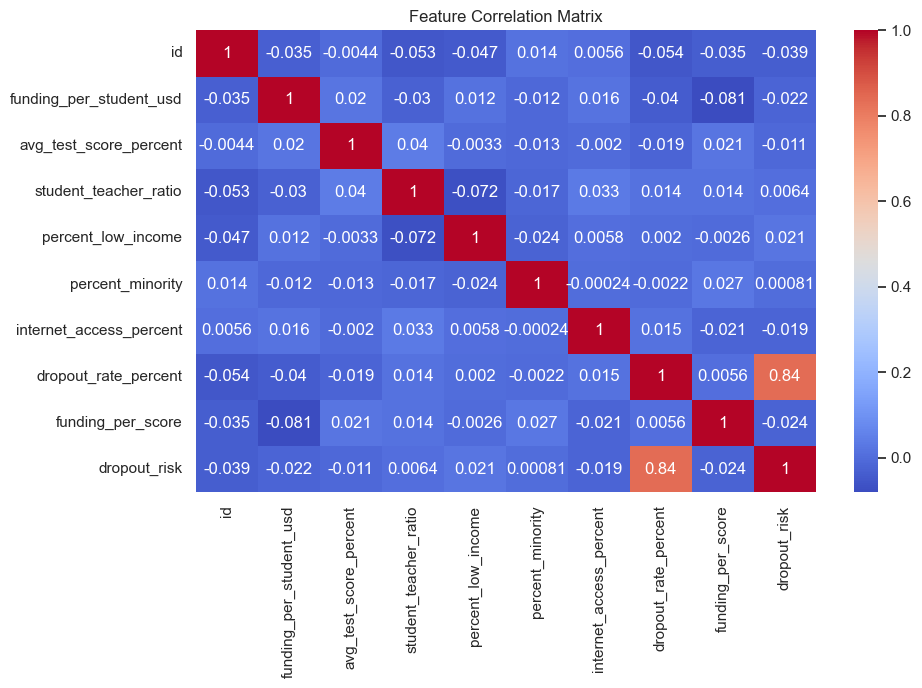

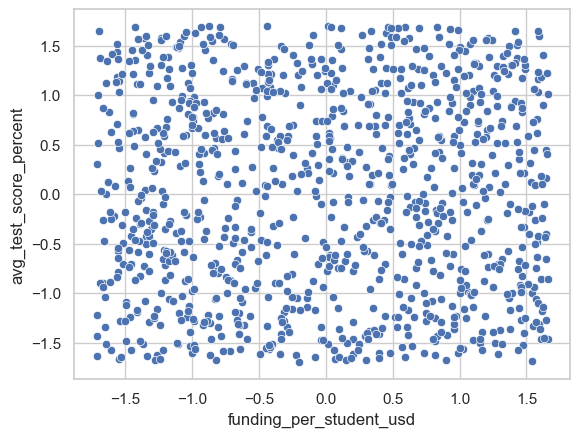

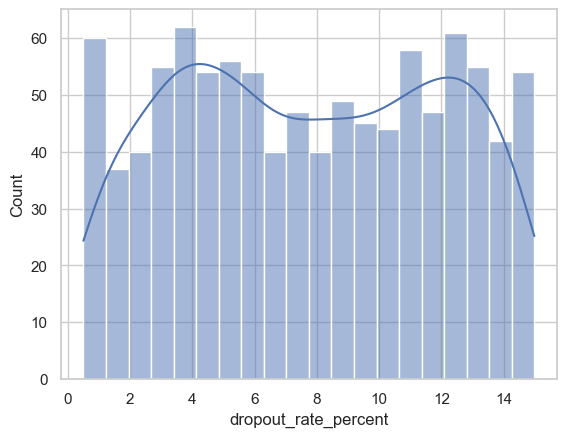

In [40]:
#EDA
import matplotlib.pyplot as plt
import seaborn as sns
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['int64', 'float64'])
# Correlation heatmap to identify which features are most related to dropout risk.
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()

# Funding vs Test Scores
sns.scatterplot(data=df, x="funding_per_student_usd", y="avg_test_score_percent")
plt.show()

# Dropout distribution
sns.histplot(df['dropout_rate_percent'], bins=20, kde=True)
plt.show()


In [61]:
# Feature engineering: funding efficiency
df_model['funding_per_score'] = df_model['funding_per_student_usd'] / (df_model['avg_test_score_percent'] + 1)
print('Feature Engineering Completed')

Feature Engineering Completed


In [62]:
#Create binary dropout risk label
df_model['dropout_risk'] = (df_model['dropout_rate_percent'] > 10).astype(int)
print(df_model['dropout_risk'].value_counts())


dropout_risk
0    645
1    355
Name: count, dtype: int64


In [63]:
#Dropped irrelevant columns
df_model.drop(['id', 'school_name', 'dropout_rate_percent'], axis=1, inplace=True)

In [64]:
#scaling the new feature
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_cols = ['funding_per_student_usd', 'avg_test_score_percent', 'student_teacher_ratio',
            'percent_low_income', 'percent_minority', 'internet_access_percent', 'funding_per_score']
df_model[num_cols] = scaler.fit_transform(df_model[num_cols])

In [65]:
#Defined features and target
X = df_model.drop('dropout_risk', axis=1)
y = df_model['dropout_risk']


In [66]:
print(df_model.columns)


Index(['grade_level', 'funding_per_student_usd', 'avg_test_score_percent',
       'student_teacher_ratio', 'percent_low_income', 'percent_minority',
       'internet_access_percent', 'funding_per_score', 'dropout_risk',
       'school_type_Charter', 'school_type_Private', 'school_type_Public',
       'state_California', 'state_Florida', 'state_Georgia', 'state_Illinois',
       'state_Michigan', 'state_New York', 'state_North Carolina',
       'state_Ohio', 'state_Pennsylvania', 'state_Texas'],
      dtype='object')


In [72]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

# Use the processed df_model
X = df_model.drop('dropout_risk', axis=1)
y = df_model['dropout_risk']

# Split and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Applied SMOTE to training data only
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train_resampled, y_train_resampled)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [73]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
# Evaluate model
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))



[[99 25]
 [62 14]]
              precision    recall  f1-score   support

           0       0.61      0.80      0.69       124
           1       0.36      0.18      0.24        76

    accuracy                           0.56       200
   macro avg       0.49      0.49      0.47       200
weighted avg       0.52      0.56      0.52       200



In [75]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

In [76]:
import pandas as pd
results = pd.DataFrame(grid_search.cv_results_)
results[['params', 'mean_test_score']].sort_values(by='mean_test_score', ascending=False)

,params,mean_test_score
6,"{'max_depth': 20, 'min_samples_split': 5, 'n_e...",0.143939
5,"{'max_depth': 20, 'min_samples_split': 2, 'n_e...",0.121158
7,"{'max_depth': 20, 'min_samples_split': 5, 'n_e...",0.120236
4,"{'max_depth': 20, 'min_samples_split': 2, 'n_e...",0.118102
0,"{'max_depth': 10, 'min_samples_split': 2, 'n_e...",0.105036
3,"{'max_depth': 10, 'min_samples_split': 5, 'n_e...",0.086132
1,"{'max_depth': 10, 'min_samples_split': 2, 'n_e...",0.083298
2,"{'max_depth': 10, 'min_samples_split': 5, 'n_e...",0.077837


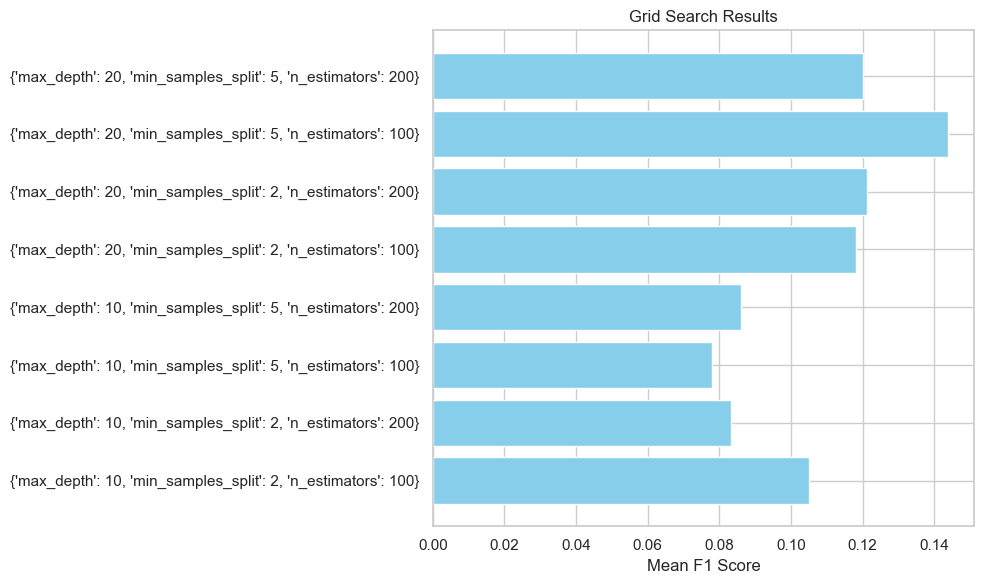

In [77]:
import matplotlib.pyplot as plt

# Extract scores and labels
scores = results['mean_test_score']
labels = results['params'].astype(str)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(labels, scores, color='skyblue')
plt.xlabel('Mean F1 Score')
plt.title('Grid Search Results')
plt.tight_layout()
plt.show()